# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# 1. Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# 2. Split the Data into Training and Testing

In [4]:
# Create our features
X = df.drop(columns=["loan_status", "homeowner"]) # Drop the loan_status and homeowner columns
# loan status is going to be the target data to predict, so we will drop it from the features 
# Create our target
y = df.loan_status.to_frame() # Convert loan_status to a dataframe

In [5]:
X.describe() # Check the data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [6]:
y.describe() # Check the data

,loan_status
count,77536
unique,2
top,low_risk
freq,75036


In [7]:
# Check the balance of our target values (notice there is a large difference between low_risk and high_risk)
y['loan_status'].value_counts() # Check the data

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [8]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #random_state=1 is used to ensure we get the same results every time 

## Data Pre-Processing

3. Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [9]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler # StandardScaler is used to scale the features
data_scaler = StandardScaler() # Create a variable to store the StandardScaler object

In [10]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
data_scaler.fit(X_train, X_test) # Fit the StandardScaler with the training data

StandardScaler()

In [11]:
X_train.describe() 

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,58152.000000,58152.000000,58152.000000,58152.000000,58152.000000,58152.000000,58152.000000
mean,9807.982529,7.293376,49231.752992,0.377465,3.827985,0.392076,19231.752992
std,2093.250476,0.889482,8371.427552,0.081385,1.903875,0.582672,8371.427552
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.828000,44900.000000,0.331849,3.000000,0.000000,14900.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.527000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [12]:
# Scale the training and testing data
X_train = data_scaler.transform(X_train) # Scale the training data with the StandardScaler and transform it to a numpy array using .transform() by passing in the training data X_train
X_train[:5] # Check the first 5 rows of the scaled training data

X_test = data_scaler.transform(X_test) # Scale the testing data with the StandardScaler and transform it to a numpy array using .transform() by passing in the testing data X_test
X_test[:5] # Check the first 5 rows of the scaled testing data

array([[ 1.33383057,  1.32170668,  1.32215708,  1.53620797,  1.14084852,
         1.04334691,  1.32215708],
       [-0.00381349, -0.00491964, -0.00379305,  0.15702536,  0.09035056,
        -0.67289855, -0.00379305],
       [ 0.52168953,  0.53584922,  0.5337543 ,  0.7848731 ,  0.61559954,
         1.04334691,  0.5337543 ],
       [ 0.42614353,  0.41892623,  0.41429933,  0.65461753,  0.61559954,
         1.04334691,  0.41429933],
       [ 0.04395951,  0.06703297,  0.06787993,  0.24729423,  0.09035056,
        -0.67289855,  0.06787993]])

# 4. Simple Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression from sklearn.linear_model
model = LogisticRegression(solver='lbfgs', random_state=1) # Create a LogisticRegression model with the solver set to 'lbfgs' and random_state set to 1
model.fit(X_train, y_train) # Fit the model with the training data

LogisticRegression(random_state=1)

In [14]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test) # Predict the test data
balanced_accuracy_score(y_test, y_pred) # Calculate the balanced accuracy score

0.9889115309798473


Bad key savefig.frameon in file /Users/jordanclayton/opt/anaconda3/envs/pyviz_prophet/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/jordanclayton/opt/anaconda3/envs/pyviz_prophet/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/jordanclayton/opt/anaconda3/envs/pyviz_prophet/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.f

<AxesSubplot:>

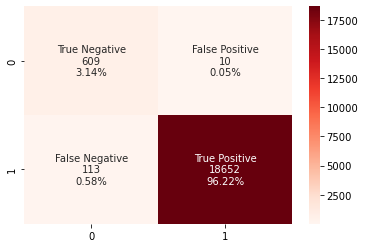

In [15]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred) # Calculate the confusion matrix with the test data and the predicted data

# Boilerplate code for plotting a confusion matrix heatmap
import seaborn as sns

group_names = ['True Negative','False Positive','False Negative','True Positive'] # create a list of the groups

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()] # flatten the confusion matrix and convert it to a list of float values
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)] # flatten the confusion matrix and convert it to a list of float values

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)] # zip the group names, group counts and group percentages together
labels = np.asarray(labels).reshape(2,2) # reshape the list of labels to a 2x2 array

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds') # create a heatmap of the confusion matrix with the labels

In [16]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced # Import classification_report_imbalanced from imblearn.metrics
print(classification_report_imbalanced(y_test, y_pred)) # Print the classification report

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.98      0.99      0.91      0.99      0.98       619
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18765

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [17]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1) # Create a RandomOverSampler object with random_state set to 1. A randomoversampler is a class that resamples the data to create an imbalanced dataset
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)# Fit and resample the training data. The fit_resample() method returns the resampled data in the form of two numpy arrays

# View the count of target classes with Counter
Counter(y_resampled) # Check the count of the target classes
y_resampled.shape # Check the shape of the resampled data

(112542, 1)

In [18]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1) # Create a LogisticRegression model with the solver set to 'lbfgs' and random_state set to 1
model.fit(X_resampled, y_resampled) # Fit the model with the resampled data
y_pred = model.predict(X_resampled) # Predict the resampled data

In [19]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_resampled, y_pred) # Calculate the balanced accuracy score with the resampled data and the predicted data

0.9947130848927511

<AxesSubplot:>

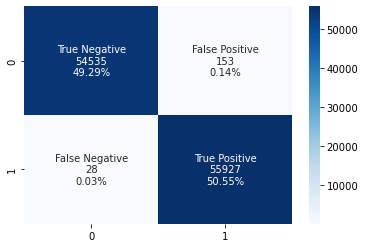

In [40]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_resampled, y_pred)

# Boilerplate confusion matrix heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive'] # create a list of the groups

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()] # flatten the confusion matrix and convert it to a list of float values
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)] # flatten the confusion matrix and convert it to a list of float values

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)] # zip the group names, group counts and group percentages together
labels = np.asarray(labels).reshape(2,2) # reshape the list of labels to a 2x2 array
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues') # create a heatmap of the confusion matrix with the labels

In [21]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_resampled, y_pred)) 
# Print the classification report with the resampled data and the predicted data. The classification report is a table that shows the classification accuracy, precision, recall, and F1 score for each class.

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.99      1.00      0.99      0.99      0.99      0.99     56271
   low_risk       1.00      0.99      1.00      0.99      0.99      0.99     56271

avg / total       0.99      0.99      0.99      0.99      0.99      0.99    112542



I am very impressed with how well the random over sampling affected the model's ability to predict, 99% accuracy is very good, and this model could be used for real world application

### SMOTE Oversampling

In [22]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE 

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train, y_train) # Create a SMOTE object with random_state set to 1 and sampling_strategy set to 1.0. The SMOTE object is a class that resamples the data to create an imbalanced dataset

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'loan_status': 1})

In [23]:
y_resampled.shape # Check the shape of the resampled data

(112542, 1)

In [24]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1) # Create a LogisticRegression model with the solver set to 'lbfgs' and random_state set to 1
model.fit(X_resampled, y_resampled) # Fit the model with the resampled data

LogisticRegression(random_state=1)

In [25]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_resampled) # Predict the resampled data
balanced_accuracy_score(y_resampled, y_pred) # Calculate the balanced accuracy score with the resampled data and the predicted data

0.9947575127507953

<AxesSubplot:>

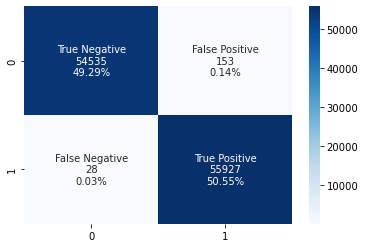

In [41]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_resampled, y_pred) # Calculate the confusion matrix with the resampled data and the predicted data

# Boilerplate confusion matrix heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [27]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_resampled, y_pred)) # Print the classification report with the resampled data and the predicted data. The classification report is a table that shows the classification accuracy, precision, recall, and F1 score for each class.

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.99      1.00      0.99      0.99      0.99      0.99     56271
   low_risk       1.00      0.99      1.00      0.99      0.99      0.99     56271

avg / total       0.99      0.99      0.99      0.99      0.99      0.99    112542



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [28]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=1) # Create a ClusterCentroids object with random_state set to 1
X_resampled, y_resampled = cc.fit_resample(X_train, y_train) # Fit and resample the training data. The fit_resample() method returns the resampled data in the form of two numpy arrays

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'loan_status': 1})

In [29]:
y_resampled.shape

(3762, 1)

In [30]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1) # Create a LogisticRegression model with the solver set to 'lbfgs' and random_state set to 1
model.fit(X_resampled, y_resampled) # Fit the model with the resampled data

LogisticRegression(random_state=1)

In [31]:
# Calculate the balanced accuracy score
y_pred = model.predict(X_resampled) # Predict the resampled data
balanced_accuracy_score(y_resampled, y_pred) # Calculate the balanced accuracy score with the resampled data and the predicted data

0.9431153641679957

<AxesSubplot:>

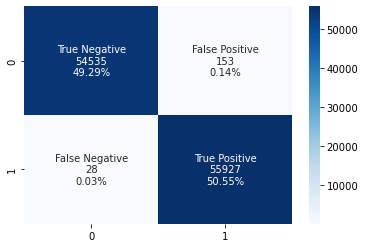

In [42]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_resampled, y_pred)

# Boilerplate confusion matrix heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [33]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_resampled, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.90      0.99      0.89      0.95      0.94      0.90      1881
   low_risk       0.99      0.89      0.99      0.94      0.94      0.88      1881

avg / total       0.95      0.94      0.94      0.94      0.94      0.89      3762



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [34]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0) # Create a SMOTEENN object with random_state set to 0. A SMOTEENN object is a class that resamples the data to create an imbalanced dataset
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train) # Fit and resample the training data. The fit_resample() method returns the resampled data in the form of two numpy arrays

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'loan_status': 1})

In [35]:
y_resampled.shape

(110643, 1)

In [36]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1) # Create a LogisticRegression model with the solver set to 'lbfgs' and random_state set to 1
model.fit(X_resampled, y_resampled) # Fit the model with the resampled data

LogisticRegression(random_state=1)

In [37]:
# Calculate the balanced accuracy score
y_pred = model.predict(X_resampled) # Predict the resampled data
balanced_accuracy_score(y_resampled, y_pred) # Calculate the balanced accuracy score with the resampled data and the predicted data

0.9983509545921582

<AxesSubplot:>

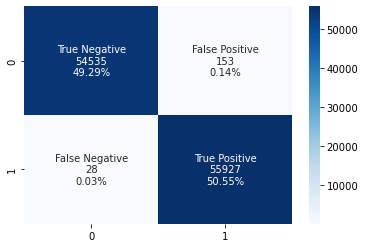

In [43]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_resampled, y_pred) # Calculate the confusion matrix with the resampled data and the predicted data

# Boilerplate confusion matrix heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [39]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_resampled, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       1.00      1.00      1.00      1.00      1.00      1.00     54688
   low_risk       1.00      1.00      1.00      1.00      1.00      1.00     55955

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    110643



Wow! Incredibly impressed with the SMOTEENN combination resampling

# Final Questions

1. Which model had the best balanced accuracy score?

    The most balanced and accurate score came from SMOTEENN. This model had a score of 0.998. 

2. Which model had the best recall score?

    Again SMOTEENN blew it out of the water with a recall score of 1.0
    This means that the model predicted 0 false negatives.

    SMOTEENN also had the best recall score. It had a score of 1.0, which equates to 0 false negatives. 

3. Which model had the best geometric mean score?

    SMOTEENN again had the best geometric mean aswell. 
